The **notebook** is meant to create a `baseline model` for **emotion classification**.  
The model is a simple `multinomial logistic regression` model, using `tf-idf` for feature extraction.  
The model performed **70% accuracy** on the test set.

***Import necessary libraries***

In [35]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the data

Lets start by importing the data.

In [63]:
# import the preprocessing pipeline
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from preproc_pipeline_script import preprocessing_pipeline

# import the data
train_data = pd.read_csv('data/raw_data/train.txt', names=['text', 'emotion'], sep=';')
test_data = pd.read_csv('data/raw_data/test.txt', names=['text', 'emotion'], sep=';')
val_data = pd.read_csv('data/raw_data/val.txt', names=['text', 'emotion'], sep=';')

# Apply the preprocessing

First of all we need to apply the preprocessing pipeline to the data.

Let's create the function and call it on all three files.

In [39]:
# apply the preprocessing pipeline
def apply_preprocessing_pipeline(data):
    total = len(data)
    for i in range(len(data)):
        print(f'Processing {i+1}/{total}...')
        data['text'][i] = preprocessing_pipeline(data['text'][i])

In [40]:
apply_preprocessing_pipeline(train_data)

Processing 1/16000...
Processing 2/16000...
Processing 3/16000...
Processing 4/16000...
Processing 5/16000...
Processing 6/16000...
Processing 7/16000...
Processing 8/16000...
Processing 9/16000...
Processing 10/16000...
Processing 11/16000...
Processing 12/16000...
Processing 13/16000...
Processing 14/16000...
Processing 15/16000...
Processing 16/16000...
Processing 17/16000...
Processing 18/16000...
Processing 19/16000...
Processing 20/16000...
Processing 21/16000...
Processing 22/16000...
Processing 23/16000...
Processing 24/16000...
Processing 25/16000...
Processing 26/16000...
Processing 27/16000...
Processing 28/16000...
Processing 29/16000...
Processing 30/16000...
Processing 31/16000...
Processing 32/16000...
Processing 33/16000...
Processing 34/16000...
Processing 35/16000...
Processing 36/16000...
Processing 37/16000...
Processing 38/16000...
Processing 39/16000...
Processing 40/16000...
Processing 41/16000...
Processing 42/16000...
Processing 43/16000...
Processing 44/16000.

In [41]:
apply_preprocessing_pipeline(test_data)

Processing 1/2000...
Processing 2/2000...
Processing 3/2000...
Processing 4/2000...
Processing 5/2000...
Processing 6/2000...
Processing 7/2000...
Processing 8/2000...
Processing 9/2000...
Processing 10/2000...
Processing 11/2000...
Processing 12/2000...
Processing 13/2000...
Processing 14/2000...
Processing 15/2000...
Processing 16/2000...
Processing 17/2000...
Processing 18/2000...
Processing 19/2000...
Processing 20/2000...
Processing 21/2000...
Processing 22/2000...
Processing 23/2000...
Processing 24/2000...
Processing 25/2000...
Processing 26/2000...
Processing 27/2000...
Processing 28/2000...
Processing 29/2000...
Processing 30/2000...
Processing 31/2000...
Processing 32/2000...
Processing 33/2000...
Processing 34/2000...
Processing 35/2000...
Processing 36/2000...
Processing 37/2000...
Processing 38/2000...
Processing 39/2000...
Processing 40/2000...
Processing 41/2000...
Processing 42/2000...
Processing 43/2000...
Processing 44/2000...
Processing 45/2000...
Processing 46/2000.

In [64]:
apply_preprocessing_pipeline(val_data)

Processing 1/2000...
Processing 2/2000...
Processing 3/2000...
Processing 4/2000...
Processing 5/2000...
Processing 6/2000...
Processing 7/2000...
Processing 8/2000...
Processing 9/2000...
Processing 10/2000...
Processing 11/2000...
Processing 12/2000...
Processing 13/2000...
Processing 14/2000...
Processing 15/2000...
Processing 16/2000...
Processing 17/2000...
Processing 18/2000...
Processing 19/2000...
Processing 20/2000...
Processing 21/2000...
Processing 22/2000...
Processing 23/2000...
Processing 24/2000...
Processing 25/2000...
Processing 26/2000...
Processing 27/2000...
Processing 28/2000...
Processing 29/2000...
Processing 30/2000...
Processing 31/2000...
Processing 32/2000...
Processing 33/2000...
Processing 34/2000...
Processing 35/2000...
Processing 36/2000...
Processing 37/2000...
Processing 38/2000...
Processing 39/2000...
Processing 40/2000...
Processing 41/2000...
Processing 42/2000...
Processing 43/2000...
Processing 44/2000...
Processing 45/2000...
Processing 46/2000.

Lets save the data into new files for future use.

In [65]:
# save the data in new file
train_data.to_csv('data/pre_proc_data/train.txt', index=False)
test_data.to_csv('data/pre_proc_data/test.txt', index=False)
val_data.to_csv('data/pre_proc_data/val.txt', index=False)

Compare the raw text with the preprocessed text

In [43]:
train_data_raw = pd.read_csv('data/raw_data/train.txt', names=['text', 'emotion'], sep=';')
train_data_raw['text'].head(5)

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: text, dtype: object

In [44]:
train_data['text'].head(5)

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: text, dtype: object

That enables us to compare the raw text with the preprocessed text, and we can see that the preprocessing pipeline is working as expected !

# Create the model class

In [52]:
# set the class labels for the confusion matrices
class_labels = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
confusion_matrix_kwargs = dict(
    text_auto=True, 
    title="Confusion Matrix", width=1000, height=800,
    labels=dict(x="Predicted", y="True Label"),
    x=class_labels,
    y=class_labels,
    color_continuous_scale='Blues'
)

# lets create the model class
class Model:
    def __init__(self, X_train, y_train, X_test, y_test, model_architecture, vectorizer, random_seed=42, test_size=0.2) -> None:
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model_instance = model_architecture
        self.vectorizer = vectorizer
        self.random_seed = random_seed
        self.test_size = test_size
        
        # we create the pipeline at the initialization
        self.pipeline = Pipeline([
            ('vectorizer', self.vectorizer),
            ('model', self.model_instance)
        ])
            
    def fit(self):
        # fit self.pipeline to the training data
        return self.pipeline.fit(self.X_train, self.y_train)
        
    def predict(self):
        # predict the test data
        return self.pipeline.predict(self.X_test)

    def predict_custom(self, X_test, y_test):
        # predict the test data and update the test data
        self.X_test = X_test
        self.y_test = y_test
        return self.pipeline.predict(self.X_test)
    
    def predict_proba(self):
        return self.pipeline.predict_proba(self.X_test)

    def report(self, y_pred, class_labels):
        # print the classification report and confusion matrix
        print(classification_report(self.y_test, y_pred, target_names=class_labels))
        confusion_matrix_toshow = confusion_matrix(self.y_test, y_pred)
        fig = px.imshow(
            confusion_matrix_toshow, 
            **confusion_matrix_kwargs
            )
        fig.show()

Lets use the model class to train a simple model.

# Create a model instance

We first need to split the data into X and y for training and testing.

In [51]:
X_train = train_data['text'].values
y_train = train_data['emotion'].values

X_test = test_data['text'].values
y_test = test_data['emotion'].values

Then we can create our instance of the model and fit it to the training data.

In [59]:
model = Model(X_train, y_train, X_test, y_test, MultinomialNB(), TfidfVectorizer())
model.fit()

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('model', MultinomialNB())])

Now the model is trained and we can use it to predict the test data.

In [60]:
y_pred = model.predict()

Lets see how the model performed.

In [61]:
model.report(y_pred, class_labels)

c:\Users\antoi\Anaconda3\envs\NPL\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\antoi\Anaconda3\envs\NPL\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\antoi\Anaconda3\envs\NPL\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

     sadness       0.94      0.34      0.50       275
       anger       0.91      0.30      0.45       224
        love       0.66      0.99      0.79       695
    surprise       1.00      0.06      0.12       159
        fear       0.69      0.93      0.79       581
         joy       0.00      0.00      0.00        66

    accuracy                           0.70      2000
   macro avg       0.70      0.44      0.44      2000
weighted avg       0.74      0.70      0.63      2000



Model results were :
```bash
              precision    recall  f1-score   support

     sadness       0.94      0.34      0.50       275
       anger       0.91      0.30      0.45       224
        love       0.66      0.99      0.79       695
    surprise       1.00      0.06      0.12       159
        fear       0.69      0.93      0.79       581
         joy       0.00      0.00      0.00        66

    accuracy                           0.70      2000
   macro avg       0.70      0.44      0.44      2000
weighted avg       0.74      0.70      0.63      2000
```

Specifically, the accuracy was 70% on the test set.

We can also analyse how the model performed on each emotion.  
We can see the model performed well on `surprise`, `sadness` and `anger`, but had a hard time with `joy` and `love`.  
It's actually worst than that since the model has 0% precision on `joy` which means it never predicted `joy` correctly.  
We can assume the model is overfitting on `love` and `joy` since it has a 99% recall on `love` and 0% precision on `joy`.

That's something we will try to fix later on.

We can also analyse the distribution of the predictions.

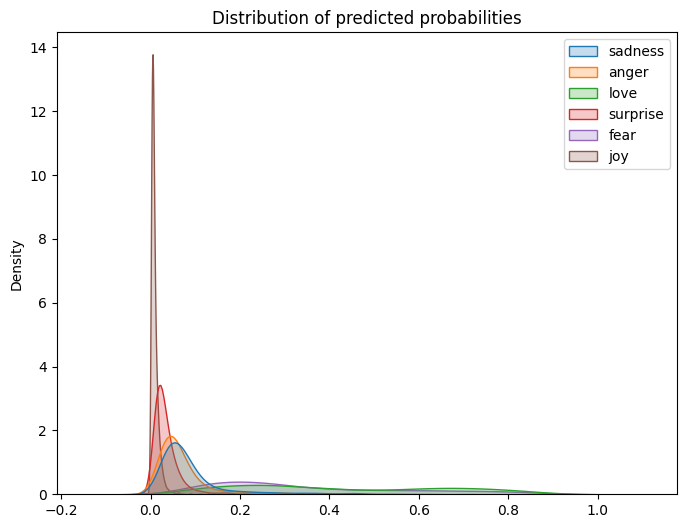

In [62]:
probas = pd.DataFrame(model.predict_proba(), columns=class_labels)
plt.figure(figsize=(8,6))
sns.kdeplot(data=probas, fill=True, )
plt.title("Distribution of predicted probabilities")
plt.show()

Looking at the distribution of the predictions, we can see that the model is predicting `surprise` and `joy` a lot more than the other emotions.  
In particular `joy`, and that makes sense since it's the most represented emotion in the test dataset.  
But that's also an issue we will try to fix later on.

Next step is to improve this model !